In [1]:
import matplotlib.pyplot as plt

In [2]:
x = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [3]:
ys = []
with open('slabResultsOg.csv', 'r') as data:
    while True:
        line = data.readline().rstrip()
        if line == "":
            break
        ys.append([ float(x)*100 for x in line.split(',')[:] ])

In [4]:
algos = ['mlp', 'lin_svm', 'rbf_svm', 'NB', 'LDA']

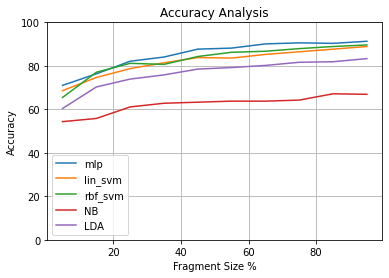

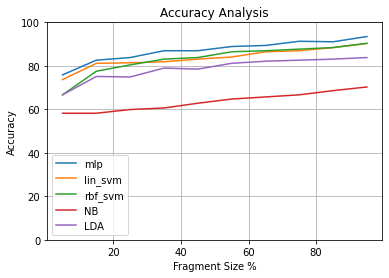

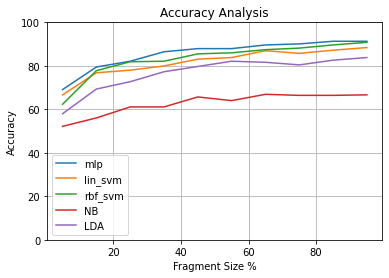

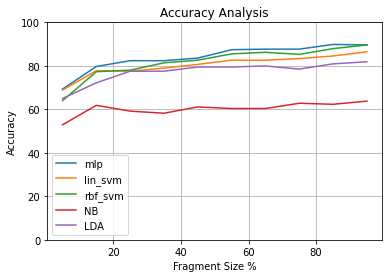

In [5]:
for i in range(4):
    y = ys[i*10:(i+1)*10]
    for j in range(5):
        algoy = []
        for k in range(10):
            algoy.append(y[k][j])
        plt.plot(x, algoy, label=algos[j])
    plt.xlabel("Fragment Size %")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Analysis")
    plt.ylim(ymin=0,ymax=100)
    plt.grid(True)
    plt.legend()
    plt.show()

In [21]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
y_pred = [7, 0, 7, 11, 7, 3, 9, 10, 9, 8, 1, 10, 5, 3, 6, 8, 11, 5, 11, 6, 4, 0, 11, 2, 5, 4, 12, 6, 4, 12, 7, 10, 11, 11, 8, 1, 0, 6, 11, 7, 6, 1, 1, 6, 3, 9, 0, 7, 11, 2, 12, 5, 0, 7, 13, 2, 3, 9, 10, 1, 4, 2, 8, 3, 11, 4, 4, 4, 9, 9, 6, 6, 9, 10, 8, 7, 2, 0, 13, 12, 9, 11, 7, 5, 1, 7, 8, 6, 4, 10, 12, 12, 7, 0, 5, 5, 7, 7, 11, 8, 6, 3, 9, 0, 2, 4, 10, 13, 1, 5, 10, 2, 3, 12, 6, 1, 1, 9, 11, 4, 10, 12, 13, 7, 3, 7, 8, 4, 9, 1, 4, 10, 10, 3, 0, 9, 0, 8, 6, 0, 2, 11, 8, 2, 1, 12, 3, 10, 8, 1, 4, 10, 9, 10, 4, 2, 7, 7, 12, 5, 10, 8, 2, 5, 0, 13, 12, 6, 0, 11, 12, 7, 5, 12, 2, 9, 6, 13, 2, 4, 9, 4, 4, 9, 12, 13, 10, 8, 4, 8, 9, 9, 6, 5, 12, 6, 11, 11, 13, 10, 9, 4, 4, 7, 2, 6, 13, 7, 8, 12, 10, 3, 4, 6, 2, 8, 10, 4, 11, 5, 10, 10, 11, 2, 7, 13, 3, 4, 1, 7, 3, 11, 0, 9, 9, 4, 1, 8, 9, 4, 2, 12, 8, 8, 11, 7, 5, 4, 5, 12, 7, 1, 2, 1, 7, 12, 6, 2, 0, 11, 10, 12, 7, 3, 4, 1, 9, 4, 5, 10, 0, 8, 10, 6, 1, 1, 3, 10, 5, 11, 5, 5, 6, 2, 1, 8, 9, 13, 7, 12, 1, 7, 6, 10, 3, 6, 6, 13, 11, 2, 5, 9, 3, 13, 0, 3, 13, 3, 12, 0, 3, 6, 11, 2, 3, 0, 10, 6, 0, 4, 13, 3, 12, 11, 13, 8, 1, 7, 13, 11, 3, 12, 9, 6, 0, 6, 1, 1, 8, 11, 4, 10, 12, 10, 5, 12, 5, 3, 8, 6, 9, 12, 9, 5, 11, 0, 11, 4, 10, 0, 8, 9, 13, 2, 9, 9, 13, 0, 2, 9, 3, 2, 13, 3, 13, 6, 7, 11, 13, 11, 2, 13, 3, 3, 0, 3, 2, 11, 2, 0, 13, 10, 0, 13, 2, 5, 12, 13, 1, 3, 3, 12, 12, 4, 11, 7, 3, 2, 3, 13, 8, 10, 2, 2]

In [30]:
y_actual = [1, 0, 7, 11, 7, 9, 9, 10, 13, 8, 1, 7, 5, 3, 8, 8, 11, 5, 7, 6, 4, 0, 11, 2, 2, 4, 12, 6, 2, 12, 10, 1, 11, 11, 6, 1, 0, 6, 11, 7, 6, 1, 1, 8, 3, 9, 0, 7, 7, 2, 12, 13, 0, 7, 5, 2, 3, 9, 10, 10, 4, 9, 8, 3, 3, 4, 10, 4, 5, 9, 6, 8, 9, 10, 8, 7, 2, 0, 9, 12, 9, 12, 7, 5, 1, 7, 8, 6, 4, 10, 12, 12, 7, 0, 5, 5, 6, 1, 11, 8, 6, 13, 9, 0, 2, 4, 10, 13, 1, 5, 10, 2, 9, 12, 6, 1, 1, 9, 11, 4, 10, 7, 13, 7, 3, 7, 8, 4, 9, 1, 4, 10, 10, 3, 0, 9, 0, 8, 8, 2, 9, 11, 8, 2, 10, 12, 5, 10, 8, 1, 4, 1, 13, 10, 4, 2, 7, 7, 12, 5, 10, 8, 2, 5, 0, 5, 12, 6, 0, 4, 12, 7, 9, 12, 2, 9, 6, 5, 9, 4, 9, 4, 4, 9, 12, 5, 10, 8, 4, 8, 9, 9, 6, 5, 12, 6, 11, 11, 0, 1, 9, 4, 4, 6, 2, 6, 0, 7, 8, 12, 10, 3, 4, 6, 2, 6, 10, 4, 11, 5, 10, 10, 11, 2, 7, 13, 5, 4, 1, 6, 3, 11, 0, 13, 9, 4, 1, 8, 9, 4, 2, 12, 8, 8, 11, 7, 5, 4, 5, 12, 7, 1, 2, 1, 1, 12, 6, 2, 0, 11, 7, 12, 7, 3, 4, 1, 9, 4, 13, 10, 0, 8, 10, 6, 1, 1, 3, 10, 5, 11, 5, 5, 8, 11, 7, 8, 9, 13, 7, 12, 1, 7, 6, 1, 3, 6, 6, 13, 11, 9, 5, 9, 3, 0, 0, 3, 5, 3, 12, 0, 3, 7, 11, 2, 3, 0, 10, 6, 0, 11, 13, 3, 12, 11, 13, 6, 1, 7, 13, 7, 3, 12, 5, 8, 4, 8, 1, 1, 8, 11, 4, 10, 12, 1, 5, 12, 5, 3, 8, 3, 5, 12, 13, 5, 11, 0, 11, 4, 10, 0, 8, 9, 13, 2, 3, 2, 13, 0, 2, 3, 3, 2, 13, 3, 13, 6, 1, 11, 13, 11, 2, 13, 3, 3, 0, 3, 2, 11, 2, 0, 6, 10, 0, 13, 0, 5, 12, 13, 10, 3, 0, 12, 12, 11, 11, 6, 13, 2, 3, 6, 8, 10, 2, 2]

In [31]:

print('Confusion Matrix')
cm = confusion_matrix(y_actual, y_pred)

Confusion Matrix


In [32]:
fileTypes = [ 'pdf', 'html', 'bmp', 'jpg', 'rtf', 'png', 'doc', 'txt', 'xls', 'gif', 'xml', 'ps', 'csv', 'gz']

<AxesSubplot:>

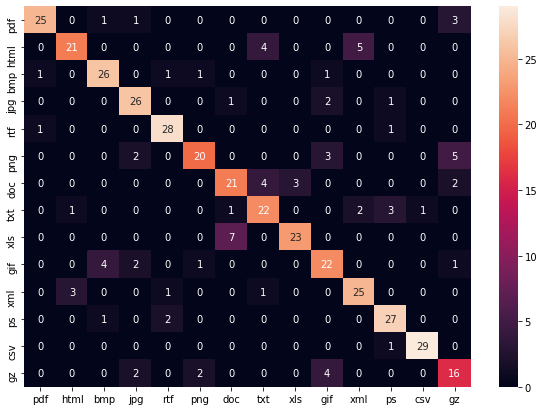

In [33]:
df_cm = pd.DataFrame(cm, index = [i for i in fileTypes], columns = [i for i in fileTypes])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)